In [70]:
# Se importan las librerías que se utilizarán en este archivo.
import pandas as pd
import json
import ast

In [71]:
# Se crea una lista donde se almacenan las filas iteradas del archivo json. posteriormente se crea un data frame con dicha lista.
data2 = []
with open('australian_user_reviews.json', "r", encoding="utf-8") as f2:
    for line in f2.readlines():
        data2.append(ast.literal_eval(line))
df_reviews = pd.DataFrame(data2)
df_reviews.head(5)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [72]:
# Se procede a desanidar la columna reviews para poder manejar la información que contiene. 
df_reviews_desanidado = df_reviews.explode('reviews')
df_reviews_desanidado = pd.concat([df_reviews_desanidado.drop(['reviews'], axis=1), df_reviews_desanidado['reviews'].apply(pd.Series)], axis=1)

In [73]:
type(df_reviews_desanidado)
df_reviews_desanidado.head(5)

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN


In [74]:
# elimino las columnas que considero no son relevantes.
df_reviews_desanidado = df_reviews_desanidado.drop(['user_url', 'funny', 'last_edited', 'helpful', 'recommend'], axis=1).dropna(axis=1, how='all')

In [75]:
df_reviews = df_reviews_desanidado

In [76]:
df_reviews_desanidado.to_csv('df_reviews_desanidado.csv', index=False)

In [ ]:
## analisis de sentimientos

In [77]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
df_reviews = pd.read_csv("df_reviews_desanidado.csv")
df_reviews['review'] = df_reviews['review'].astype(str)

nltk.download('vader_lexicon')
df_reviews['review'] = df_reviews['review'].fillna('')
sia = SentimentIntensityAnalyzer()
df_reviews['sentiment_score'] = df_reviews['review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [78]:
df_reviews.head(5)

,user_id,posted,item_id,review,sentiment_score
0,76561197970982479,"Posted November 5, 2011.",1250.0,Simple yet with great replayability. In my opi...,0.8481
1,76561197970982479,"Posted July 15, 2011.",22200.0,It's unique and worth a playthrough.,0.2263
2,76561197970982479,"Posted April 21, 2011.",43110.0,Great atmosphere. The gunplay can be a bit chu...,0.9117
3,js41637,"Posted June 24, 2014.",251610.0,I know what you think when you see this title ...,0.9566
4,js41637,"Posted September 8, 2013.",227300.0,For a simple (it's actually not all that simpl...,0.9708


In [79]:
df_TitulosJuegos = pd.read_csv('df_TitulosJuegos.csv')
df_reviews = df_reviews.merge(df_TitulosJuegos, on='item_id', how='inner')

In [ ]:
## inicia mi EDA

In [80]:
df_reviews

,user_id,posted,item_id,review,sentiment_score,item_name
0,76561197970982479,"Posted November 5, 2011.",1250.0,Simple yet with great replayability. In my opi...,0.8481,Killing Floor
1,76561197970982479,"Posted November 5, 2011.",1250.0,Simple yet with great replayability. In my opi...,0.8481,Killing Floor
2,76561197970982479,"Posted November 5, 2011.",1250.0,Simple yet with great replayability. In my opi...,0.8481,Killing Floor
3,76561197970982479,"Posted November 5, 2011.",1250.0,Simple yet with great replayability. In my opi...,0.8481,Killing Floor
4,76561197970982479,"Posted November 5, 2011.",1250.0,Simple yet with great replayability. In my opi...,0.8481,Killing Floor
...,...,...,...,...,...,...
43665027,23Batman05,"Posted September 19, 2013.",215870.0,improve on graphics?,0.4404,Dungeon Party
43665028,RimEmiR,"Posted January 19, 2015.",290830.0,KOCIK,0.0000,Chaos Heroes Online
43665029,76561198106612756,"Posted October 4, 2014.",242590.0,my favorite ... ilike it,0.4588,Saints Row IV Inauguration Station
43665030,76561198106612756,"Posted October 4, 2014.",242590.0,my favorite ... ilike it,0.4588,Saints Row IV Inauguration Station


In [81]:
average_sentiment = df_reviews['sentiment_score'].mean()
num_positive_reviews = len(df_reviews[df_reviews['sentiment_score'] > 0])
num_negative_reviews = len(df_reviews[df_reviews['sentiment_score'] < 0])
num_neutral_reviews = len(df_reviews[df_reviews['sentiment_score'] == 0])

In [82]:
positive_reviews = df_reviews[df_reviews['sentiment_score'] > 0]
negative_reviews = df_reviews[df_reviews['sentiment_score'] < 0]

In [83]:
mean_sentiment = df_reviews['sentiment_score'].mean()
mean_sentiment

0.37784034948606066

In [84]:
median_sentiment = df_reviews['sentiment_score'].median()
median_sentiment

0.4927

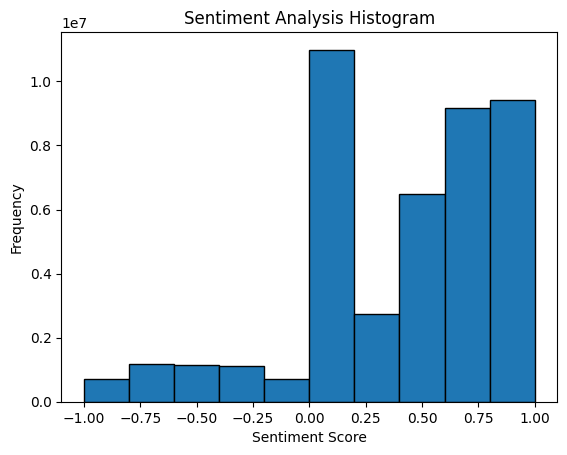

In [85]:
#Se genera un histograma para ver la distribución de los datos

import matplotlib.pyplot as plt
plt.hist(df_reviews['sentiment_score'], bins=10, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis Histogram')
plt.show()

In [86]:

# Se toma una muestra del dataet original para poder ejecutar el modelo de ML
sample_df = df_reviews.sample(n=1000, random_state=69)

In [87]:
mean_sentiment = sample_df['sentiment_score'].mean()
sample_df['sentiment_score'] = sample_df['sentiment_score'].fillna(mean_sentiment)

In [12]:
sample_df.tail(25)

,user_id,posted,item_id,review,sentiment_score,item_name
975,kevin_rudd,"Posted August 10, 2012.",220.0,A master piece of gaming almost as good as art...,0.6420,Half-Life 2
976,SerenityAndCans,"Posted December 23, 2015.",4000.0,"Is gud. 5 stars, 10/10, 4 stars.",0.0000,Garry's Mod
977,76561198048709944,"Posted March 15, 2014.",4000.0,A must get for all gamers who enjoy making ran...,0.6124,Garry's Mod
978,norsktf,"Posted April 29, 2015.",4000.0,ya sure its a good game but dont play it on ma...,0.0119,Garry's Mod
979,ethanol10,"Posted December 4, 2013.",220.0,This game.... Is AWESOME! the way that the gam...,0.8811,Half-Life 2
980,76561198101994484,"Posted October 30, 2014.",4000.0,It's so ♥♥♥♥ing awesome it makes awesome look ...,0.9341,Garry's Mod
981,companothemuslim,Posted June 18.,4000.0,5yearolds/10,0.0000,Garry's Mod
982,rtd98,"Posted February 12, 2014.",4000.0,The creativity of this game is amazing. There ...,0.7269,Garry's Mod
983,rexmatical,"Posted April 19, 2013.",4000.0,"666 hours, time to stop playing.",-0.1027,Garry's Mod
984,Dimah36,"Posted June 22, 2014.",730.0,"Solid game, hours upon hours of fun!",0.6360,Counter-Strike: Global Offensive


In [89]:
sample_df.to_csv("sample_df.csv", index=False)

## se inicia el modelo de ML de recomendacion

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

sample_df = pd.read_csv("sample_df.csv")
item_profiles = sample_df.groupby('item_id').agg({'sentiment_score': 'mean', 'item_name': 'first'}).reset_index()


similarity_matrix = cosine_similarity(item_profiles[['sentiment_score']])

def recomendacion_juego(item_id:int):
        item_index = item_profiles[item_profiles['item_id'] == item_id].index
        if item_index.empty:
            print("No existe este juego.")
            return [], []
        item_index = item_index[0]
        similar_items_indices = similarity_matrix[item_index].argsort()[::-1][1:6]
        recommendations = sample_df.loc[similar_items_indices, 'item_id'].tolist()
        recommendation_names = sample_df.loc[similar_items_indices, 'item_name'].tolist()
        return recommendations, recommendation_names
    

recomendacion_juego(10)

([4000.0, 4000.0, 220.0, 4000.0, 4000.0],
 ["Garry's Mod", "Garry's Mod", 'Half-Life 2', "Garry's Mod", "Garry's Mod"])